###### In this Lab, we will learn how to read a csv file and do a simple linear regression with the data.

In [3]:
import pandas as pd

Use read_csv() method to read the csv file and see what it looks like.

In [4]:
df = pd.read_csv("raw_data.csv")

# Note that df is alreaady a DataFrame 

In [4]:
# The head(n) method returns the first n rows (five rows if a number is not specified) 

df.head() 

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
# To display summary statistics

df.describe()

,Height,Weight
count,101.000000,101.000000
mean,66.265342,158.908897
std,3.916032,33.878136
min,56.547975,84.872124
25%,63.407290,132.282978
50%,66.199283,157.380965
75%,69.076171,186.434168
max,75.205974,241.893563


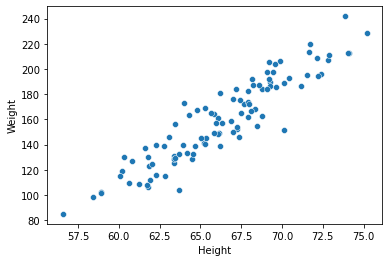

In [6]:
# Let's visualize!
import seaborn as sns

# scatterplot() is used for semantic groupings
plot1 = sns.scatterplot(y='Weight', x='Height', data=df)

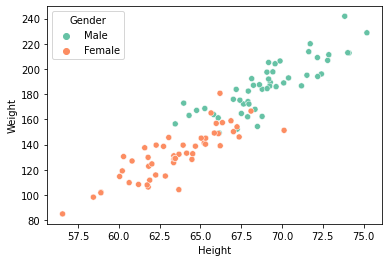

In [8]:
# show Gender 
plot2 = sns.scatterplot(y='Weight', x='Height', data=df, hue="Gender",palette="Set2")

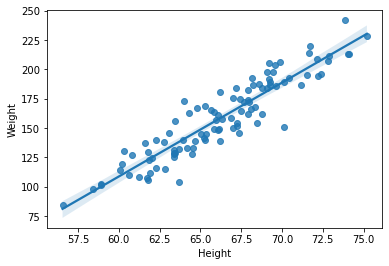

In [10]:
# regplot() plots data AND a linear regression model fit. 
plot3 = sns.regplot(y='Weight', x='Height', data=df, ci=98)

# "ci" is the size of confidence interval. 
# If ci is given, the estimate will be bootstrapped and a confidence interval will be drawn.

### Linear Regression

In [5]:
import matplotlib.pyplot as plt
from scipy import stats

x = df["Height"]
y = df["Weight"]

# linear regression
# two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero
# standard error of the estimate

stats.linregress(x, y)

LinregressResult(slope=7.991756492673595, intercept=-370.66758233014866, rvalue=0.9237809850827543, pvalue=4.619122301537903e-43, stderr=0.33293933389622266, intercept_stderr=22.1004494539065)

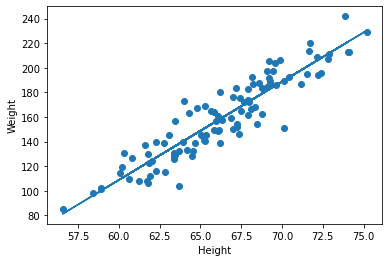

The slope is 7.992 
The y-intercept is -370.668 
The coefficient of determination (r-squared value) is 0.853 
The (two-sided) p-value is 4.619122301537903e-43 
The standard error of the estimate is  0.333


In [12]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

def lin_eq(x):
 return slope * x + intercept

plt.scatter(x, y)
plt.plot(x, lin_eq(x))

# plt.ylim(ymin=0, ymax=300)
# plt.xlim(xmin=0, xmax=100)
plt.xlabel("Height")
plt.ylabel ("Weight")
plt.show()

print("The slope is " "%.3f" % slope, "\n"
      "The y-intercept is " "%.3f" % intercept, "\n"
      "The coefficient of determination (r-squared value) is " "%.3f" % r**2, "\n" 
      "The (two-sided) p-value is " + str(p), "\n"
      "The standard error of the estimate is " " %.3f" % std_err)